# Data Cleaning

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load data from csv file
df = pd.read_csv("/kaggle/input/synthetic-transaction-monitoring-dataset-aml/SAML-D.csv")
df.shape

(9504852, 12)

The dataset has more than 9 million entries , for simplicity purpose we use only  around 200k entries

In [ ]:
df = df.sample(n=200000, random_state=1)

df.shape

(200000, 12)

In [ ]:
# check for duplicates
df = df.drop_duplicates(keep = 'first')
df.shape

(200000, 12)

In [ ]:
df.tail()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
8606623,15:17:25,2023-07-23,7029921966,3828530251,5632.33,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Plus_Mutual
6346650,11:37:07,2023-05-08,3518726122,9768510209,7214.17,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
8957570,18:28:26,2023-08-04,9456347626,1570347336,1940.43,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
7654334,13:26:45,2023-06-21,5296246312,6172615079,6304.50,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_In
9065824,13:04:39,2023-08-08,6517474457,8029865996,775.45,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out


In [ ]:
# Check for null or NaN values
print(df.isna().sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [ ]:
# check for blank strings
print((df == '').sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [ ]:
# Data types
print("\nData types:")
print(df.dtypes)


Data types:
Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object


# Data Preprocessing

In [ ]:
# number of transactions per payment type
transactions_per_payment_type = df['Payment_type'].value_counts()

# number of laundering transactions per payment type
laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size()

transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 Cheque             42499
 Credit card        42413
 Debit card         42405
 ACH                42146
 Cross-border       19581
 Cash Withdrawal     6205
 Cash Deposit        4751
 Name: count, dtype: int64,
 Payment_type
 ACH                26
 Cash Deposit       31
 Cash Withdrawal    21
 Cheque             23
 Credit card        26
 Cross-border       49
 Debit card         19
 dtype: int64)

In [ ]:
df['Sender_bank_location'].unique()

array(['UK', 'UAE', 'Morocco', 'Japan', 'Germany', 'Italy', 'France',
       'Mexico', 'Pakistan', 'Albania', 'Nigeria', 'Switzerland',
       'Turkey', 'Netherlands', 'USA', 'India', 'Austria', 'Spain'],
      dtype=object)

In [ ]:
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,5.001152e+09,5.001039e+09,8750.761190,0.000975
std,2.887164e+09,2.882951e+09,21957.159439,0.031210
min,3.209500e+04,1.326600e+04,6.140000,0.000000
25%,2.498540e+09,2.512679e+09,2150.647500,0.000000
50%,4.994117e+09,4.996041e+09,6112.375000,0.000000
75%,7.505735e+09,7.489113e+09,10491.497500,0.000000
max,9.999987e+09,9.999958e+09,984679.650000,1.000000


In [ ]:
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     759709.070000
mean     17432.592045
min         29.070000
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     984679.650000
mean      8742.288144
min          6.140000
Name: Amount, dtype: float64


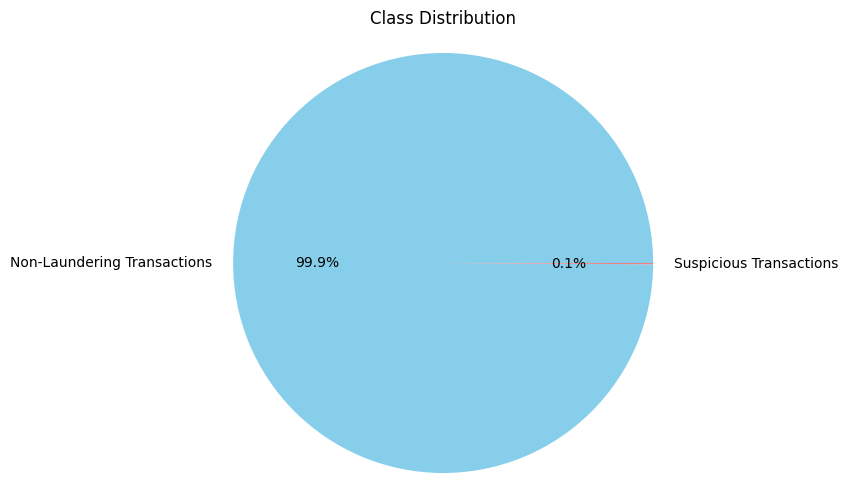

In [ ]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

In [ ]:
#handling imbalance in the dataset
#using SMOTE (Synthectic Monitory Over-sampling Technique)
from imblearn.over_sampling import SMOTE

In [ ]:
# Check the initial class distribution
print("Initial class distribution:")
print(df['Is_laundering'].value_counts(normalize=True))

Initial class distribution:
Is_laundering
0    0.999025
1    0.000975
Name: proportion, dtype: float64


In [ ]:
# Separate the features and the target
X = df.drop(columns=['Is_laundering'])
y = df['Is_laundering'] #target

In [ ]:
# Convert time and date columns to datetime objects
X['Time'] = pd.to_datetime(X['Time'], format='%H:%M:%S')
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')

In [ ]:
# Extract features from date if needed, here extracting year, month, day
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

In [ ]:
# Extract features from date if needed, here extracting year, month, day
X['Hour'] = X['Time'].dt.hour
X['Minute'] = X['Time'].dt.minute
X['Second'] = X['Time'].dt.second

In [ ]:
# Drop the original Date and Time columns
X = X.drop(columns=['Date', 'Time'])

In [ ]:
#one hot encoding some columns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Identify categorical columns for one-hot encoding
categorical_columns = [
    'Payment_currency',
    'Received_currency',
    'Sender_bank_location',
    'Receiver_bank_location',
    'Payment_type',
    'Laundering_type'
]
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns)

In [ ]:
# Define the SMOTE model with the desired sampling strategy
#Is_landuring should have around 30% 1's
smote = SMOTE(sampling_strategy=0.3, random_state=42)


In [ ]:
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
data = pd.DataFrame(X_resampled, columns=X.columns)
data['Is_laundering'] = y_resampled


/tmp/ipykernel_33/2233099442.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Is_laundering'] = y_resampled


In [ ]:
# Check the new class distribution
print("New class distribution:")
print(data['Is_laundering'].value_counts(normalize=True))

New class distribution:
Is_laundering
0    0.769232
1    0.230768
Name: proportion, dtype: float64


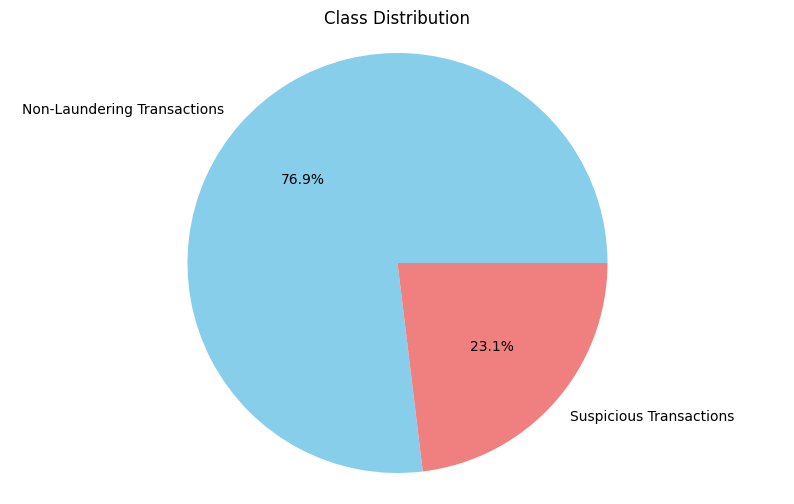

In [ ]:
class_distribution = data['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

In [ ]:
# Data types
print("\nData types:")
print(data.dtypes)


Data types:
Sender_account                         int64
Receiver_account                       int64
Amount                               float64
Year                                   int32
Month                                  int32
                                      ...   
Laundering_type_Single_large            bool
Laundering_type_Smurfing                bool
Laundering_type_Stacked Bipartite       bool
Laundering_type_Structuring             bool
Is_laundering                          int64
Length: 106, dtype: object


In [ ]:
data.head()

,Sender_account,Receiver_account,Amount,Year,Month,Day,Hour,Minute,Second,Payment_currency_Albanian lek,...,Laundering_type_Normal_Periodical,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring,Is_laundering
0,4248061080,9527052910,13480.74,2023,8,14,2,8,46,False,...,False,True,False,False,False,False,False,False,False,0
1,9130896737,908371799,10480.05,2023,7,2,19,48,23,False,...,False,False,False,False,False,False,False,False,False,0
2,1466348255,8545558838,26232.35,2023,7,22,12,4,24,False,...,False,False,False,False,False,False,False,False,False,0
3,2181923623,6234034932,447.07,2022,10,28,17,8,2,False,...,False,False,True,False,False,False,False,False,False,0
4,8596132461,3638213339,1005.62,2023,2,21,22,44,17,False,...,False,False,True,False,False,False,False,False,False,0


In [ ]:
data.columns[59]

'Receiver_bank_location_Japan'

In [ ]:
#creating high_risk_countries column
# List of high-risk countries
high_risk_countries = {"Nigeria", "Morocco", "Turkey", "Pakistan", "Mexico", "Spain"}
# Identify one-hot encoded columns for high-risk countries
sender_columns = [f"Sender_bank_location_{country}" for country in high_risk_countries]
receiver_columns = [f"Receiver_bank_location_{country}" for country in high_risk_countries]

In [ ]:
# Check if any of the sender or receiver columns indicate a high-risk country
data['high_risk_countries'] = data[sender_columns + receiver_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


/tmp/ipykernel_33/998888715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['high_risk_countries'] = data[sender_columns + receiver_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


In [ ]:
data.head()

,Sender_account,Receiver_account,Amount,Year,Month,Day,Hour,Minute,Second,Payment_currency_Albanian lek,...,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring,Is_laundering,high_risk_countries
0,4248061080,9527052910,13480.74,2023,8,14,2,8,46,False,...,True,False,False,False,False,False,False,False,0,0
1,9130896737,908371799,10480.05,2023,7,2,19,48,23,False,...,False,False,False,False,False,False,False,False,0,0
2,1466348255,8545558838,26232.35,2023,7,22,12,4,24,False,...,False,False,False,False,False,False,False,False,0,0
3,2181923623,6234034932,447.07,2022,10,28,17,8,2,False,...,False,True,False,False,False,False,False,False,0,0
4,8596132461,3638213339,1005.62,2023,2,21,22,44,17,False,...,False,True,False,False,False,False,False,False,0,0


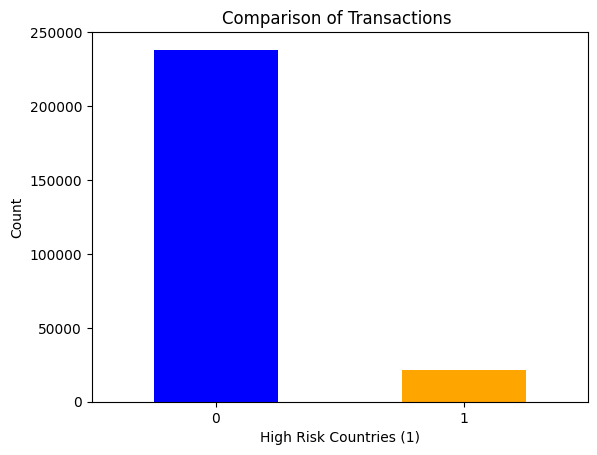

In [ ]:
counts = data['high_risk_countries'].value_counts()

# Plotting the counts
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('High Risk Countries (1)')
plt.ylabel('Count')
plt.title('Comparison of Transactions ')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()